
# **TG2**






---
---
# Parte 1 : Procesamiento de los datos
---
---

---
# 1. Cargar librerías
---

In [0]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

---
# 2. Generamos un dataset random
---

In [0]:
c1 = np.array([1,2,6])
c2 = np.array([2,3,7])
c3 = np.array([9,1,8])

data_1 = np.random.randn(300,3) + c1
data_2 = np.random.randn(300,3) + c2
data_3 = np.random.randn(300,3) + c3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
from sklearn.utils import shuffle
data = shuffle(data, random_state=0)

label_1 = [0]*300
label_2 = [1]*300
label_3 = [2]*300

label = np.concatenate((label_1, label_2, label_3), axis = 0)

print(data.shape)
print(label.shape)


(900, 3)
(900,)


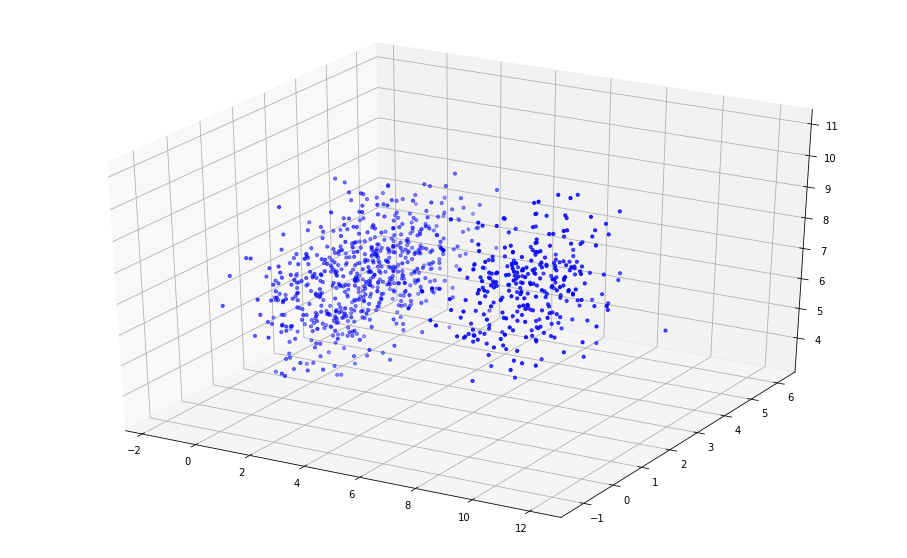

In [0]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2], c='blue', s=10)
plt.show()



---
---
# Parte 2 : Reducción de dimensionalidad y clustering
---
---

---
# 1. tSNE
---

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
intermediates_tsne = tsne.fit_transform(data)
intermediates_tsne.shape

(900, 2)

---
# 2. Visualizar tSNE
---

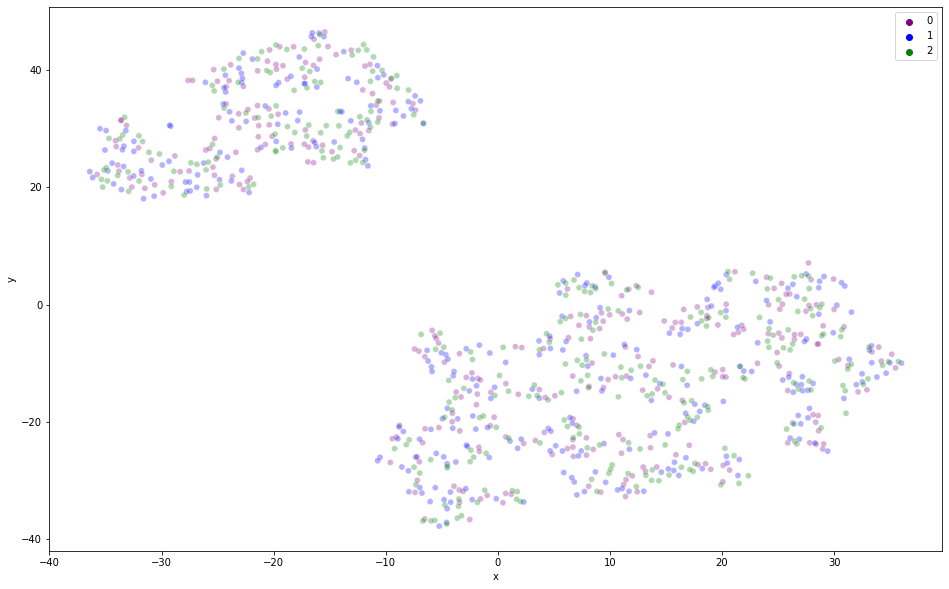

In [0]:
df_subset = pd.DataFrame(intermediates_tsne,columns=['x','y'])
df_subset.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", 
    y="y",
    hue=label,
    palette=['purple','blue','green'],
    data=df_subset,
    legend="full",
    alpha=0.3)

---
# 3. Clustering tSNE
---

### Algoritmo de clustering basado en centroides
### KMeans 

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
#print(len(kmeans.labels_))
print(len(kmeans.cluster_centers_))


3


### Algoritmo de clustering basado en densidad
### DBSCAN

In [0]:
clustering = DBSCAN(eps=3, min_samples=500).fit(data)
clustering.labels_
n_clusters = len(set(clustering.labels_)) 
print(n_clusters)

2


### Diferencias KMeans y DBSCAN

![](https://www.hipparchus.org/hipparchus-clustering/images/userguide/cluster_comparison.png)



[figura DBSCAN](https://bitsandbricks.github.io/post/dbscan-machine-learning-para-detectar-centros-de-actividad-urbana/)

---
# 4. Visualizar clusters
---

### KMeans

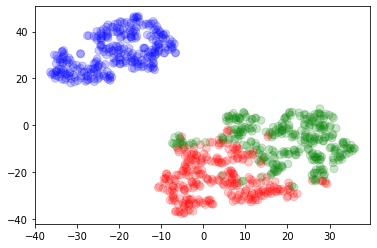

In [0]:
colores=['blue','red','green']
asignar=[]
for row in kmeans.labels_:
    asignar.append(colores[row])
plt.scatter(intermediates_tsne[:,0],intermediates_tsne[:,1], c=asignar,s=60,alpha=0.2)

### DBSCAN

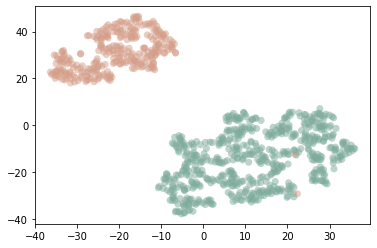

In [0]:
color_palette = sns.color_palette('deep', n_clusters)
cols = sns.color_palette("Set2", n_colors=n_clusters, desat=.5)
cl = [cols[i] for i in clustering.labels_]
plt.scatter(intermediates_tsne[:,0],intermediates_tsne[:,1], s=50, linewidth=0, c=cl, alpha=0.5)